Importar librerias y data set

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer el data set
df = pd.read_csv("Fish.csv")

Proceso de data wrangling

In [3]:
# Verificar el tipo de datos, el número de filas y columnas, y si hay valores nulos o duplicados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.shape


(159, 7)

In [5]:
df.isnull().sum()


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Limpiar y transformar los datos (en este caso no hay mucho que hacer, solo cambiar el nombre de una columna)
df = df.rename(columns={"Length1":"Length_vertical"})

In [8]:
# Explorar los datos con estadísticas descriptivas y gráficos
df.describe()


,Weight,Length_fish_cm,Height_fish_cm,Width_fish_cm,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [9]:
df["Species"].value_counts()


Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [10]:
df.corr() 


ValueError: could not convert string to float: 'Bream'

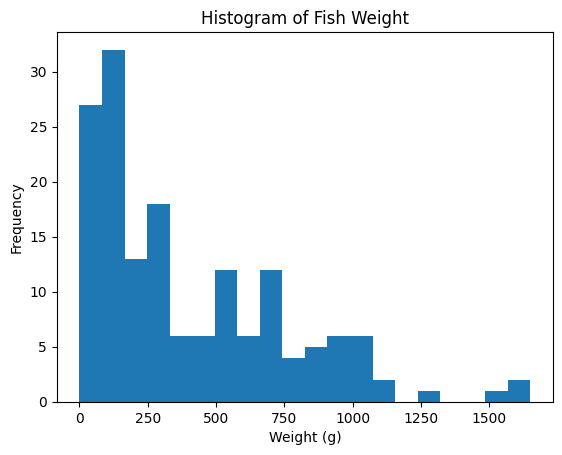

In [ ]:
# Hacer un histograma del peso de los peces
plt.hist(df["Weight"], bins=20)
plt.xlabel("Weight (g)")
plt.ylabel("Frequency")
plt.title("Histogram of Fish Weight")
plt.show()

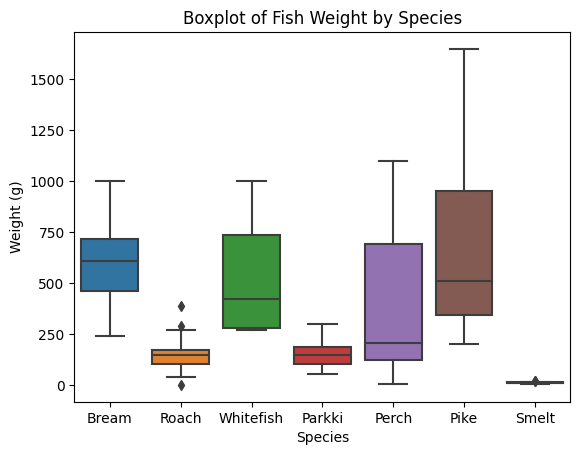

In [ ]:
# Hacer un boxplot del peso de los peces según la especie
sns.boxplot(x="Species", y="Weight", data=df)
plt.xlabel("Species")
plt.ylabel("Weight (g)")
plt.title("Boxplot of Fish Weight by Species")
plt.show()

In [ ]:
# Hacer un gráfico de dispersión del peso y la longitud vertical de los peces
plt.scatter(df["Weight"], df["Length_Vertical"])
plt.xlabel("Weight (g)")
plt.ylabel("Length Vertical (cm)")
plt.title("Scatterplot of Fish Weight and Length Vertical")
plt.show()

KeyError: 'Length_Vertical'

In [ ]:
# Hacer un mapa de calor de la matriz de correlación entre las variables numéricas
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Heatmap of Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Bream'

**Regresion lineal simple:** Predecir el peso de los peces en funcion a su longitud:

In [ ]:
from sklearn.linear_model import LinearRegression

# Seleccionar las variables predictoras y la variable objetivo
X = df[["Length_Vertical"]]
y = df["Weight"]

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Hacer una predicción con una longitud vertical de 25 cm
prediction = model.predict([[25]])

# Imprimir la predicción
print(f"La predicción del modelo para un pez con una longitud vertical de 25 cm es {prediction[0]:.2f} gramos.")


**Regresion lineal multiple:** Predecir el peso de los peces en funcion a su longitud vertical y anchuratransversal:

In [ ]:
from sklearn.linear_model import LinearRegression

# Seleccionar las variables predictoras y la variable objetivo
X = df[["Length_Vertical", "Width"]]
y = df["Weight"]

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Hacer una predicción con una longitud vertical de 25 cm y una anchura transversal de 10 cm
prediction = model.predict([[25, 10]])

# Imprimir la predicción
print(f"La predicción del modelo para un pez con una longitud vertical de 25 cm y una anchura transversal de 10 cm es {prediction[0]:.2f} gramos.")


**Regresion lineal multiple:** Predecir el peso de los peces en función de su longitud vertical, anchura transversal y su especie:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Seleccionar las variables predictoras y la variable objetivo
X = df[["Length_Vertical", "Width", "Species"]]
y = df["Weight"]

# Crear un codificador one-hot para la variable categórica 'Species'
encoder = OneHotEncoder()
ct = ColumnTransformer([("encoder", encoder, [2])], remainder="passthrough")
X_encoded = ct.fit_transform(X)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X_encoded, y)

# Hacer una predicción para un Bass con una longitud vertical de 25 cm y una anchura transversal de 10 cm
prediction = model.predict([[1, 0, 0, 25, 10]])

# Imprimir la predicción
print(f"La predicción del modelo para un Bass con una longitud vertical de 25 cm y una anchura transversal de 10 cm es {prediction[0]:.2f} gramos.")
